In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [284]:
f = 0.01
A = np.array([[(1-f)**-1, 0],[0, 1-f]])

class Point:
    def __init__(self, n, x):
        self.n = n
        self.x = x
    
    def __str__(self):
        return "<n: %i x: %s>" % (self.n, str(self.x))
    
    def __repr__(self):
        return self.__str__()

class Run:
    
    def __init__(self):
        self.f      = 0.0
        self.sigma  = 0.2
        self.A      = np.array([[(1-self.f)**-1, 0],[0, 1-self.f]])
        self.X      = [Point(1, np.array([0.1, 0.1]))]
        self.n_min  = 1e-6
        self.n_init = 1e-6
        
        self.mu     = 2e-7
        self.eps    = 5e-3
        
        self.grid_fineness = 6
        
        self.time    = 0
        #self.history = []
        self.points  = set()
    
    def b(self, x):
        return 1 - np.dot(np.dot(A, x),x)
    
    def a(self, x, y):
        return np.exp(-np.dot(x-y, x-y) / (2 * self.sigma**2))
    
    def I(self, x):
        return sum((p.n * self.a(p.x,y) for p in self.X))
    
    def generate_nearby_point(self, x):
        random_point = (np.random.random(x.shape) * 2 - 1) * self.eps
        
        if np.linalg.norm(random_point) > self.eps:
            return self.generate_nearby_point(x)
        
        return x + random_point.round(self.grid_fineness)
    
    def step(self):
        for p in self.X:
            p.n += (self.b(p.x) - self.I(p.x)) * p.n
        
        self.X = [p for p in self.X if p.n >= self.n_min]
        
        if self.time % 100 == 0:
            for p in self.X:
                if np.random.random() < self.mu * self.b(p.x) * p.n*100:
                    p.n  -= self.n_init
                    self.X.append(Point(self.n_init, self.generate_nearby_point(p.x)))
        
        self.time += 1
        if self.time % 100 == 0:
        #    self.history.append(self.X)
            self.points |= set([tuple(p.x) for p in self.X])

In [291]:
r = Run()
for _ in range(20000):
    r.step()
print(r.X)

[<n: 610503753 x: [0.1 0.1]>, <n: 0 x: [0.096552 0.101782]>, <n: 655 x: [0.096644 0.098142]>, <n: 0 x: [0.100828 0.097379]>, <n: 0 x: [0.097021 0.099569]>, <n: 0 x: [0.101729 0.095576]>, <n: 2 x: [0.09575  0.100321]>, <n: 0 x: [0.09952  0.098983]>, <n: 0 x: [0.096348 0.101476]>, <n: 0 x: [0.100275 0.0992  ]>, <n: 0 x: [0.099669 0.100134]>, <n: 0 x: [0.10013  0.096779]>, <n: 0 x: [0.100601 0.099315]>, <n: 2 x: [0.100044 0.095376]>, <n: 0 x: [0.098943 0.099957]>, <n: 0 x: [0.096663 0.101242]>, <n: 0 x: [0.10013  0.098648]>, <n: 11 x: [0.097168 0.097656]>, <n: 4 x: [0.099517 0.095524]>, <n: 0 x: [0.100131 0.095644]>, <n: 0 x: [0.100476 0.095397]>, <n: 0 x: [0.09832  0.099876]>, <n: 167 x: [0.097717 0.095835]>, <n: 0 x: [0.096913 0.099639]>, <n: 0 x: [0.095923 0.101504]>, <n: 0 x: [0.098301 0.101308]>, <n: 0 x: [0.09846 0.09686]>, <n: 0 x: [0.099782 0.096106]>, <n: 17 x: [0.096149 0.097335]>, <n: 2 x: [0.09612  0.098179]>, <n: 0 x: [0.099486 0.097532]>, <n: 3 x: [0.095496 0.098446]>, <n: 3

In [292]:
sum([p.n for p in r.X])

610504626.3237032

<IPython.core.display.Javascript object>


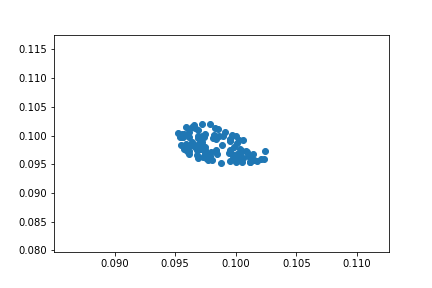

In [293]:
points = np.array([list(x) for x in r.points])
plt.figure()
plt.scatter(points[:, 0], points[:, 1]);

In [60]:
asd = np.zeros((100,100))
for i, x in enumerate(np.linspace(-1, 1, 100)):
    for j, y in enumerate(np.linspace(-1, 1, 100)):
        X = np.array([x,y])
        asd[i, j] = b(X)

<IPython.core.display.Javascript object>


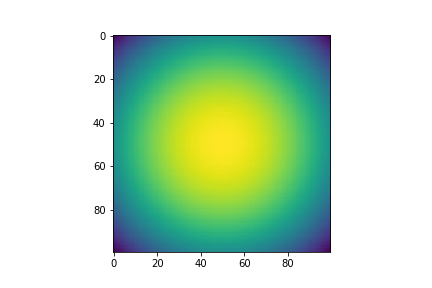

In [64]:
plt.figure()
plt.imshow(asd)

In [65]:
%matplotlib notebook

<IPython.core.display.Javascript object>


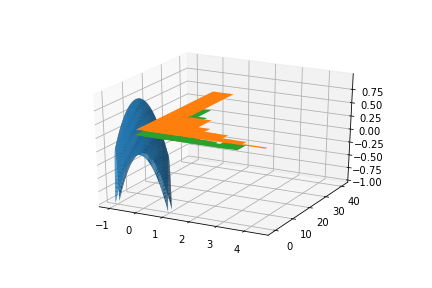

In [66]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

grids = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
ax.plot_surface(grids[0], grids[1], asd)